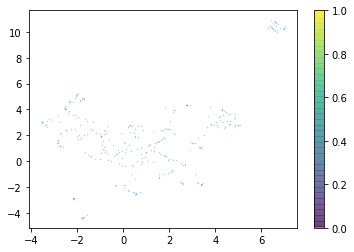

In [12]:
posi_path = '/Users/tkimura/Desktop/RNP/svm/svm_out_normed_ori.csv'
figpath =  '/Users/tkimura/Desktop/RNP/check_contact/UMAP/all.png'
from scipy.sparse.csgraph import connected_components
import umap, numpy as np
from sklearn.datasets import load_digits
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import numba
from numba import njit

uscls = tuple(range(7, 85))
# print(uscls)

@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

def run_UMAP(input_file):
    vec_data = np.loadtxt(input_file, delimiter=',', usecols=uscls, skiprows=1)
    reducer = umap.UMAP(n_neighbors=5)
    # label_data = np.loadtxt(input_file, delimiter=',', usecols=0, skiprows=1)
    label_data = np.loadtxt(input_file, delimiter=',', usecols=0, skiprows=1, dtype='str')
    
    embedding = reducer.fit_transform(vec_data)
    fig = plt.figure()
    # plt.scatter(embedding[:, 0], embedding[:, 1], c=label_data, cmap='tab20c', s=10, alpha=0.5)
    plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab20c', s=0.1, alpha=0.5)
    plt.colorbar()
    # for i in range(embedding.shape[0]):
    #     plt.text(embedding[i,0], embedding[i,1], str(label_data[i]), fontsize=2)
    fig.savefig(figpath, dpi=1200)

run_UMAP(posi_path)